In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data import and preparation

In [2]:
pd.set_option('display.max_columns',None)  

In [3]:
raw_data = pd.read_csv('./world-data-2023.csv')

In [4]:
raw_data

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",254.90%,VED,2.27,52.70%,$0.00,"$482,359,318,768",97.20%,79.30%,21.4,Caracas,72.1,125.0,$0.01,Spanish,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,2.80%,VND,2.05,48.10%,$0.80,"$261,921,244,843",110.60%,28.50%,16.5,Ho Chi Minh City,75.3,43.0,$0.73,Vietnamese,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,8.10%,YER,3.79,1.00%,$0.92,"$26,914,402,224",93.60%,10.20%,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",212.31,9.20%,ZMW,4.63,65.20%,$1.40,"$23,064,722,446",98.70%,4.10%,40.4,Lusaka,63.5,213.0,$0.24,English,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [5]:
raw_data = raw_data.rename(columns={'Density\n(P/Km2)':'Density(P/Km2)',
                                    'Agricultural Land( %)':'Agricultural Land(%)',
                                    'Armed Forces size':'Armed Forces',
                                    'Capital/Major City':'Capital',
                                    'CPI Change (%)':'CPI Change(%)',
                                    'Forested Area (%)':'Forested Area(%)',
                                    'Gross primary education enrollment (%)':'Primary educ. enr.(%)',
                                    'Gross tertiary education enrollment (%)':'Tertiary educ. enr.(%)',
                                    'Out of pocket health expenditure':'Self-paid Health',
                                    'Tax revenue (%)':'Tax revenue(%)',
                                    'Official language':'Language',
                                    'Physicians per thousand':'Doctors/1000',
                                    'Population: Labor force participation (%)':'Labor force participation(%)',
                                    'Urban_population':'Urban population'})

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       195 non-null    object 
 1   Density(P/Km2)                195 non-null    object 
 2   Abbreviation                  188 non-null    object 
 3   Agricultural Land(%)          188 non-null    object 
 4   Land Area(Km2)                194 non-null    object 
 5   Armed Forces                  171 non-null    object 
 6   Birth Rate                    189 non-null    float64
 7   Calling Code                  194 non-null    float64
 8   Capital                       192 non-null    object 
 9   Co2-Emissions                 188 non-null    object 
 10  CPI                           178 non-null    object 
 11  CPI Change(%)                 179 non-null    object 
 12  Currency-Code                 180 non-null    object 
 13  Ferti

In [7]:
raw_data.loc[:,'Country':'Birth Rate']

,Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces,Birth Rate
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49
1,Albania,105,AL,43.10%,"28,748","9,000",11.78
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28
3,Andorra,164,AD,40.00%,468,NaN,7.20
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73
...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19


In [8]:
raw_data.loc[:,'Calling Code':'Fertility Rate']

,Calling Code,Capital,Co2-Emissions,CPI,CPI Change(%),Currency-Code,Fertility Rate
0,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47
1,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62
2,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02
3,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27
4,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52
...,...,...,...,...,...,...,...
190,58.0,Caracas,"164,175","2,740.27",254.90%,VED,2.27
191,84.0,Hanoi,"192,668",163.52,2.80%,VND,2.05
192,967.0,Sanaa,"10,609",157.58,8.10%,YER,3.79
193,260.0,Lusaka,"5,141",212.31,9.20%,ZMW,4.63


In [9]:
raw_data.loc[:,'Life expectancy':'Population']

,Life expectancy,Maternal mortality ratio,Minimum wage,Language,Self-paid Health,Doctors/1000,Population
0,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754"
1,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191"
2,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054"
3,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142"
4,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295"
...,...,...,...,...,...,...,...
190,72.1,125.0,$0.01,Spanish,45.80%,1.92,"28,515,829"
191,75.3,43.0,$0.73,Vietnamese,43.50%,0.82,"96,462,106"
192,66.1,164.0,NaN,Arabic,81.00%,0.31,"29,161,922"
193,63.5,213.0,$0.24,English,27.50%,1.19,"17,861,030"


In [10]:
raw_data.loc[:,'Forested Area(%)':'Largest city'] 

,Forested Area(%),Gasoline Price,GDP,Primary educ. enr.(%),Tertiary educ. enr.(%),Infant mortality,Largest city
0,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul
1,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana
2,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers
3,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella
4,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda
...,...,...,...,...,...,...,...
190,52.70%,$0.00,"$482,359,318,768",97.20%,79.30%,21.4,Caracas
191,48.10%,$0.80,"$261,921,244,843",110.60%,28.50%,16.5,Ho Chi Minh City
192,1.00%,$0.92,"$26,914,402,224",93.60%,10.20%,42.9,Sanaa
193,65.20%,$1.40,"$23,064,722,446",98.70%,4.10%,40.4,Lusaka


In [11]:
raw_data.loc[:,'Labor force participation(%)':]

,Labor force participation(%),Tax revenue(%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
0,48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...
190,59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [12]:
raw_data = raw_data.drop(['Abbreviation','Calling Code','Capital','Currency-Code','Largest city','Language',
                        'Latitude','Longitude'],axis=1)

In [13]:
cols_to_convert = raw_data.select_dtypes(include=['object']).columns.difference(['Country'])

In [14]:
raw_data[cols_to_convert] = raw_data[cols_to_convert].apply(lambda x: x.str.replace('[%,$]','',regex=True).astype(float))

In [15]:
ordered_columns = [
    # demography
    "Country","Density(P/Km2)","Urban population","Population",
    
    # economy
    "Armed Forces","GDP","Minimum wage","Labor force participation(%)","Unemployment rate","Tax revenue(%)","Total tax rate","CPI","CPI Change(%)",
    
    # health
    "Doctors/1000","Self-paid Health","Birth Rate","Fertility Rate","Life expectancy","Infant mortality","Maternal mortality ratio",
    
    # enviroment
    "Co2-Emissions","Land Area(Km2)","Forested Area(%)","Agricultural Land(%)","Gasoline Price",
    
    # education
    "Primary educ. enr.(%)", "Tertiary educ. enr.(%)",
]

In [16]:
raw_data = raw_data[ordered_columns]

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       195 non-null    object 
 1   Density(P/Km2)                195 non-null    float64
 2   Urban population              190 non-null    float64
 3   Population                    194 non-null    float64
 4   Armed Forces                  171 non-null    float64
 5   GDP                           193 non-null    float64
 6   Minimum wage                  150 non-null    float64
 7   Labor force participation(%)  176 non-null    float64
 8   Unemployment rate             176 non-null    float64
 9   Tax revenue(%)                169 non-null    float64
 10  Total tax rate                183 non-null    float64
 11  CPI                           178 non-null    float64
 12  CPI Change(%)                 179 non-null    float64
 13  Docto

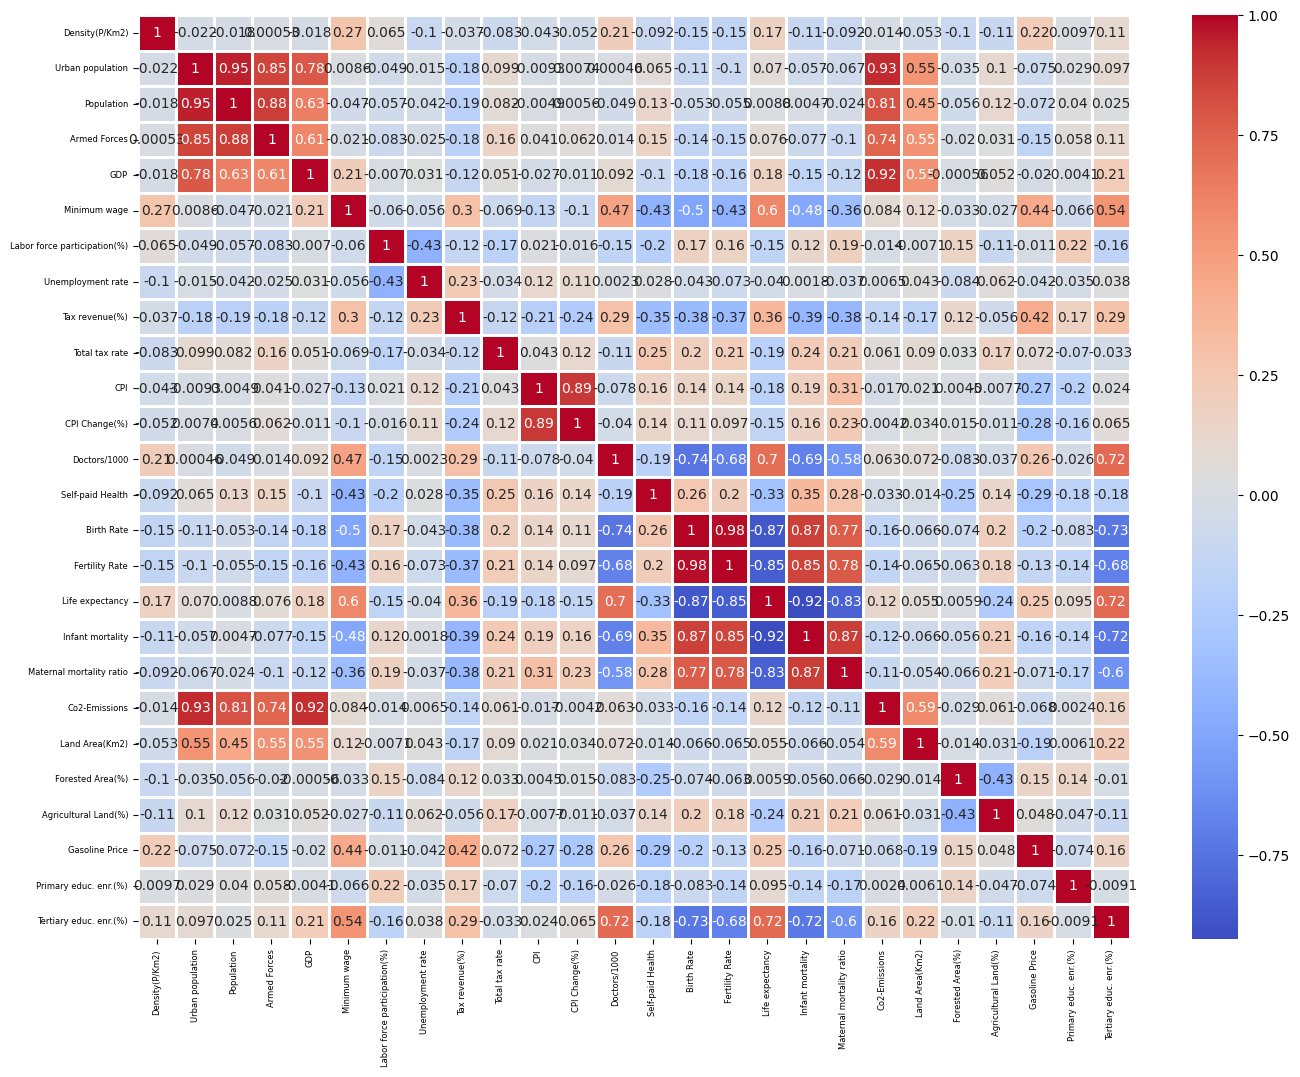

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(raw_data.drop(['Country'],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.show()

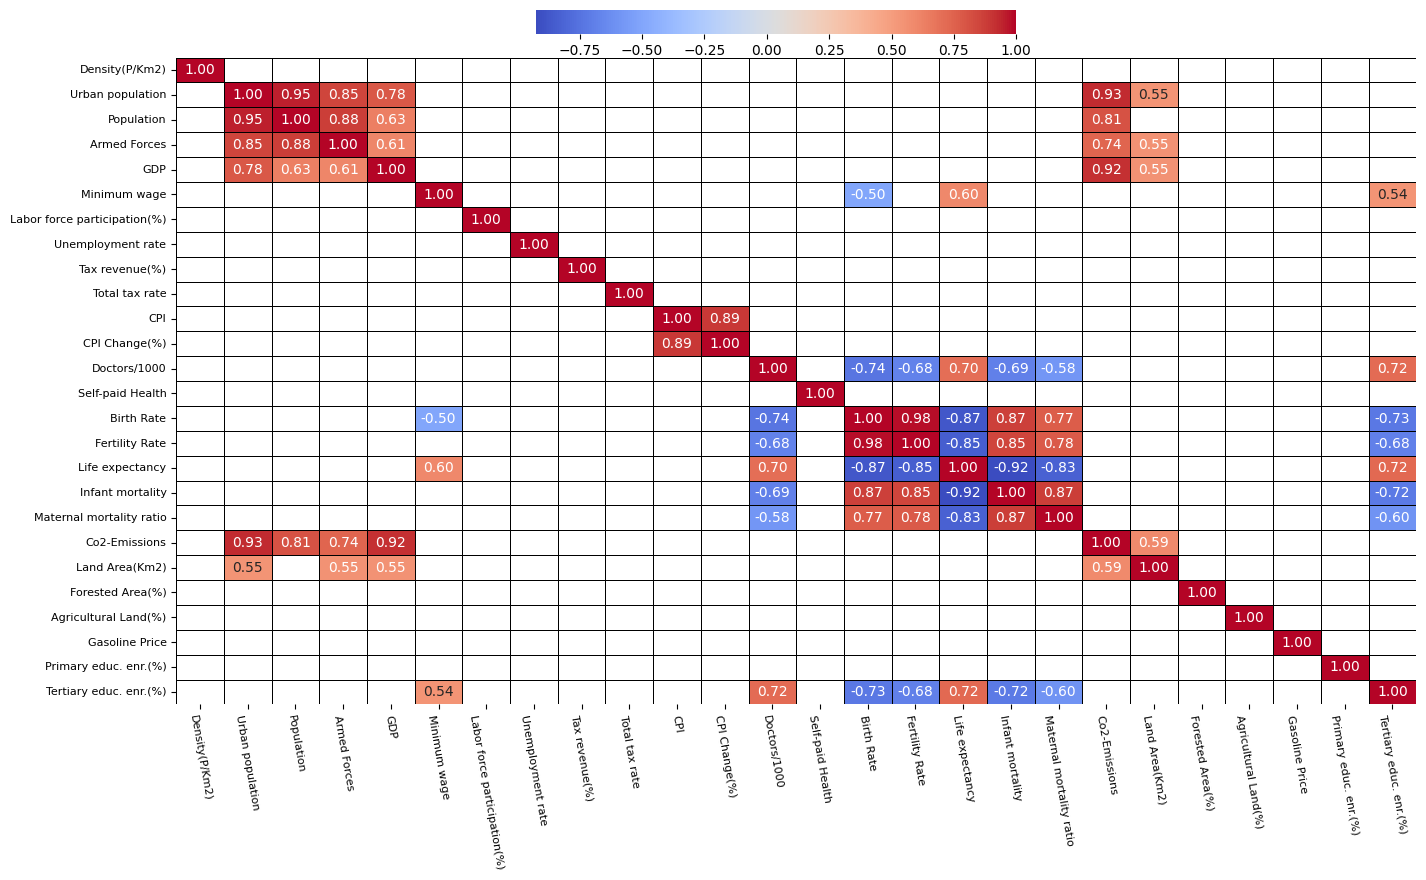

In [19]:
plt.figure(figsize=(16,12))
corr_matrix = raw_data.drop(['Country'],axis=1).corr()

mask = np.abs(corr_matrix) < 0.5 

ax = sns.heatmap(corr_matrix,cmap='coolwarm',linecolor='black',linewidths=0.5,annot=True,fmt=".2f",mask=mask,
                 cbar_kws={"orientation":"horizontal"})  
cbar = ax.collections[0].colorbar
cbar.ax.set_position([0.3, 0.9, 0.4, 0.02])  

plt.xticks(fontsize=8, rotation=280)  
plt.yticks(fontsize=8)
plt.show()

In [20]:
dataset = raw_data.drop(['Agricultural Land(%)','Land Area(Km2)','Co2-Emissions','CPI Change(%)','Fertility Rate',
                         'Forested Area(%)','Gasoline Price','Minimum wage','Tertiary educ. enr.(%)',
                         'Maternal mortality ratio','Self-paid Health','Tax revenue(%)','Population','Urban population'],axis=1)

In [21]:
dataset.dropna(inplace=True)

In [22]:
dataset.head()

,Country,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Doctors/1000,Birth Rate,Life expectancy,Infant mortality,Primary educ. enr.(%)
0,Afghanistan,60.0,323000.0,1.910135e+10,48.9,11.12,71.4,149.90,0.28,32.49,64.5,47.9,104.0
1,Albania,105.0,9000.0,1.527808e+10,55.7,12.33,36.6,119.05,1.20,11.78,78.5,7.8,107.0
2,Algeria,18.0,317000.0,1.699882e+11,41.2,11.70,66.1,151.36,1.72,24.28,76.7,20.1,109.9
4,Angola,26.0,117000.0,9.463542e+10,77.5,6.89,49.1,261.73,0.21,40.73,60.8,51.6,113.5
6,Argentina,17.0,105000.0,4.496634e+11,61.3,9.79,106.3,232.75,3.96,17.02,76.5,8.8,109.7


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       160 non-null    object 
 1   Density(P/Km2)                160 non-null    float64
 2   Armed Forces                  160 non-null    float64
 3   GDP                           160 non-null    float64
 4   Labor force participation(%)  160 non-null    float64
 5   Unemployment rate             160 non-null    float64
 6   Total tax rate                160 non-null    float64
 7   CPI                           160 non-null    float64
 8   Doctors/1000                  160 non-null    float64
 9   Birth Rate                    160 non-null    float64
 10  Life expectancy               160 non-null    float64
 11  Infant mortality              160 non-null    float64
 12  Primary educ. enr.(%)         160 non-null    float64
dtypes: float64

In [24]:
dataset.describe()

,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Doctors/1000,Birth Rate,Life expectancy,Infant mortality,Primary educ. enr.(%)
count,160.000000,1.600000e+02,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000
mean,212.762500,1.563000e+05,5.733593e+11,62.725625,6.797938,39.821875,171.256812,1.821063,20.365562,72.40875,21.358125,103.108125
std,707.705696,3.785845e+05,2.375542e+12,10.274455,4.918317,15.347225,232.114955,1.578942,9.989200,7.65809,19.782584,11.829996
min,2.000000,0.000000e+00,4.290166e+08,38.000000,0.090000,8.000000,99.030000,0.010000,6.400000,52.80000,1.400000,61.800000
25%,31.750000,1.075000e+04,1.433814e+10,56.425000,3.395000,30.600000,115.142500,0.340000,11.225000,66.67500,5.975000,98.950000
50%,83.000000,2.950000e+04,5.355460e+10,62.150000,5.375000,37.550000,129.090000,1.570000,18.125000,74.10000,13.750000,102.350000
75%,152.250000,1.365000e+05,3.034813e+11,68.950000,9.207500,47.500000,162.537500,2.982500,28.832500,77.87500,33.825000,107.525000
max,8358.000000,3.031000e+06,2.142770e+13,86.800000,28.180000,106.300000,2740.270000,7.120000,46.080000,84.20000,84.500000,142.500000


# exploratory data analysis

In [25]:
# sns.pairplot(dataset)

In [26]:
dataset.drop(['Country',],axis=1).corr()

,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Doctors/1000,Birth Rate,Life expectancy,Infant mortality,Primary educ. enr.(%)
Density(P/Km2),1.000000,-0.001345,-0.009631,0.075132,-0.114883,-0.154226,-0.044617,0.042005,-0.150781,0.173086,-0.126198,-0.000836
Armed Forces,-0.001345,1.000000,0.632299,-0.136101,-0.003975,0.158017,0.062207,-0.004192,-0.144134,0.082285,-0.076016,0.037946
GDP,-0.009631,0.632299,1.000000,-0.007185,0.038622,0.089542,-0.029153,0.107927,-0.200245,0.182254,-0.165022,-0.017783
Labor force participation(%),0.075132,-0.136101,-0.007185,1.000000,-0.469287,-0.153379,-0.077920,-0.171388,0.187142,-0.171871,0.158137,0.253734
Unemployment rate,-0.114883,-0.003975,0.038622,-0.469287,1.000000,0.008996,0.113326,0.050809,-0.020339,-0.042230,-0.010792,0.001884
Total tax rate,-0.154226,0.158017,0.089542,-0.153379,0.008996,1.000000,0.196402,-0.095829,0.212422,-0.159051,0.237243,-0.012215
CPI,-0.044617,0.062207,-0.029153,-0.077920,0.113326,0.196402,1.000000,-0.090192,0.089296,-0.106954,0.097473,-0.055368
Doctors/1000,0.042005,-0.004192,0.107927,-0.171388,0.050809,-0.095829,-0.090192,1.000000,-0.763491,0.732420,-0.731764,-0.110495
Birth Rate,-0.150781,-0.144134,-0.200245,0.187142,-0.020339,0.212422,0.089296,-0.763491,1.000000,-0.881060,0.876464,0.053573
Life expectancy,0.173086,0.082285,0.182254,-0.171871,-0.042230,-0.159051,-0.106954,0.732420,-0.881060,1.000000,-0.935249,-0.031870


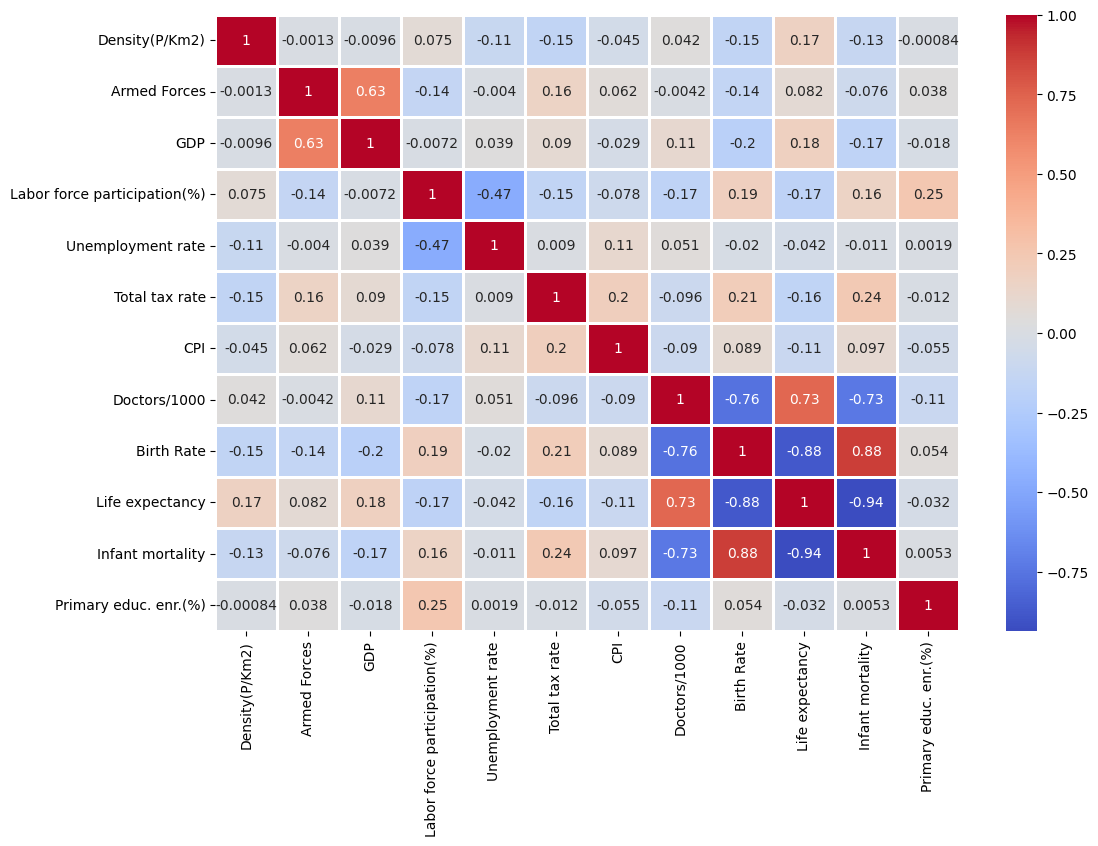

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.drop(['Country',],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.show()